画像のクラスタリング

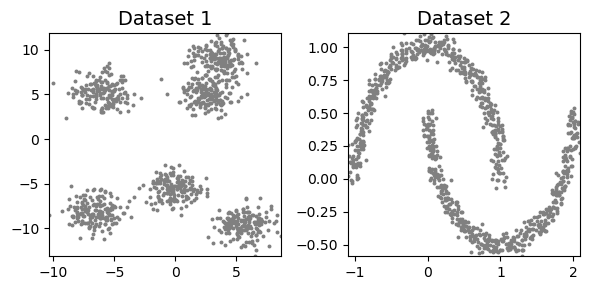

In [2]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

# 塊のデータセット
dataset1 = datasets.make_blobs(n_samples=1000, random_state=10, centers=6, cluster_std=1.2)[0]

# 月のデータセット
dataset2 = datasets.make_moons(n_samples=1000, noise=.05)[0]

# グラフ作成
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', title1 = 'Dataset 1', title2 = 'Dataset 2'):

    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6, 3)

    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)

    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)

    fig.tight_layout()
    plt.show()

cluster_plots(dataset1, dataset2)

--- 0.16830921173095703 seconds ---
Dataset1
Cluster 0: 320
Cluster 1: 333
Cluster 2: 180
Cluster 3: 167


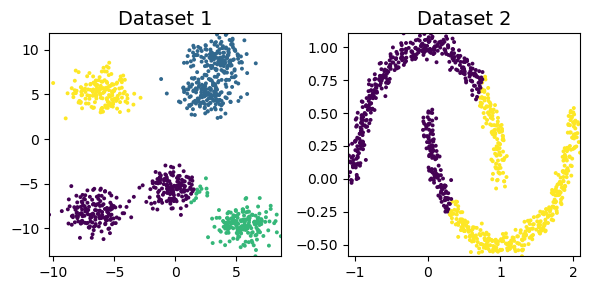

In [3]:
# k-mean++クラスタリング
start_time = time.time()

kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, init='k-means++',n_init=10).fit_predict(dataset1)
kmeans_dataset2 = cluster.KMeans(n_clusters=2, max_iter=300, init='k-means++',n_init=10).fit_predict(dataset2)
print("--- %s seconds ---" % (time.time() - start_time))
print('Dataset1')
print(*["Cluster "+str(i)+": "+ str(sum(kmeans_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, kmeans_dataset1, kmeans_dataset2)

--- 0.03812980651855469 seconds ---
Dataset1:
Number of Noise Points: 16 (1000)
Dataset2:
Number of Noise Points: 0 (1000)


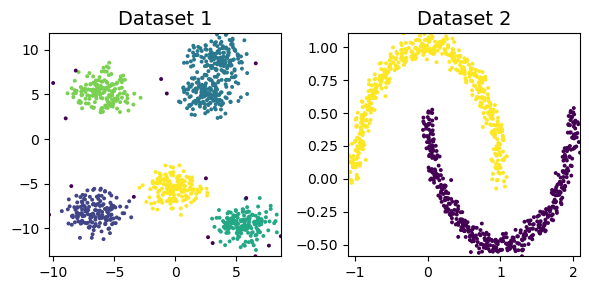

In [4]:
# DBSCANクラスタリングを作成
start_time = time.time()

dbscan_dataset1 = cluster.DBSCAN(eps=1, min_samples=5, metric='euclidean').fit_predict(dataset1)
dbscan_dataset2 = cluster.DBSCAN(eps=1, min_samples=5, metric='euclidean').fit_predict(dataset2)

# noise points are assigned -1
print("--- %s seconds ---" % (time.time() - start_time))
print('Dataset1:')
print("Number of Noise Points: ",sum(dbscan_dataset1==-1)," (",len(dbscan_dataset1),")",sep='')
print('Dataset2:')
print("Number of Noise Points: ",sum(dbscan_dataset2==-1)," (",len(dbscan_dataset2),")",sep='')
dbscan_dataset2 = cluster.DBSCAN(eps=0.1, min_samples=5, metric='euclidean').fit_predict(dataset2)
cluster_plots(dataset1, dataset2, dbscan_dataset1, dbscan_dataset2)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x414 at 0x7FF5A899F730>


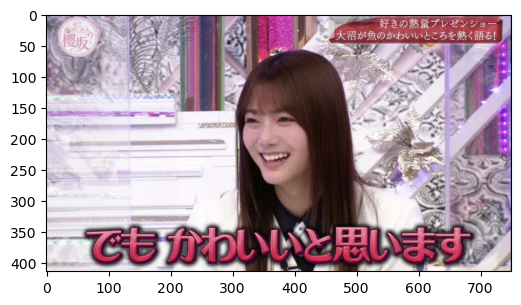

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x919 at 0x7FF5A8999550>


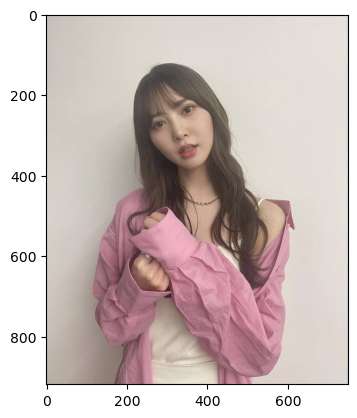

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x972 at 0x7FF58D699F10>


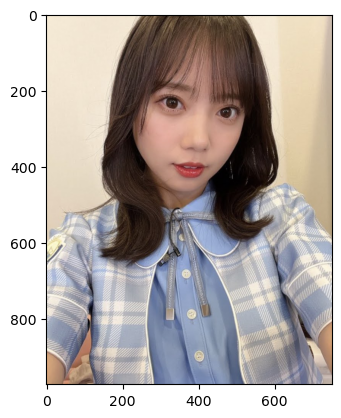

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x1334 at 0x7FF58D699460>


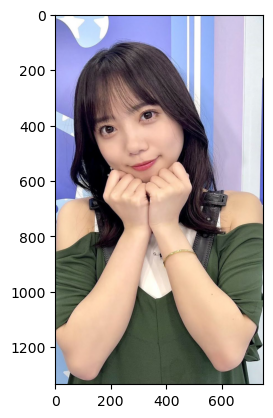

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1334x750 at 0x7FF58D5444F0>


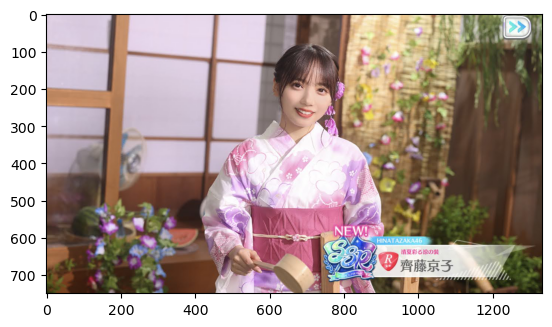

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x990 at 0x7FF58D699400>


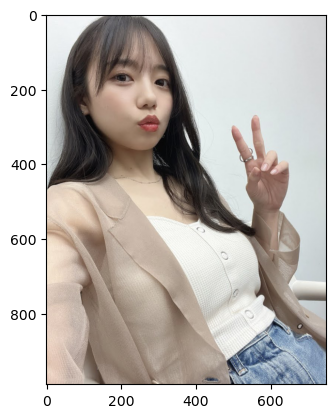

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x416 at 0x7FF5A96570D0>


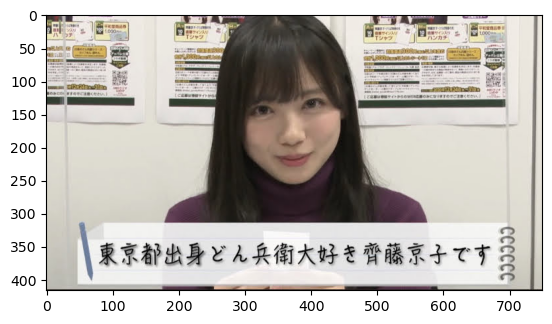

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x413 at 0x7FF5A5A97880>


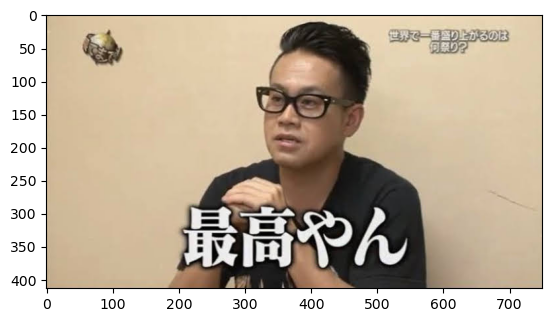

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x972 at 0x7FF5A96715E0>


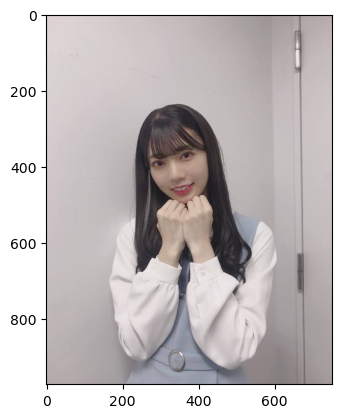

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1334x750 at 0x7FF5A6F33B20>


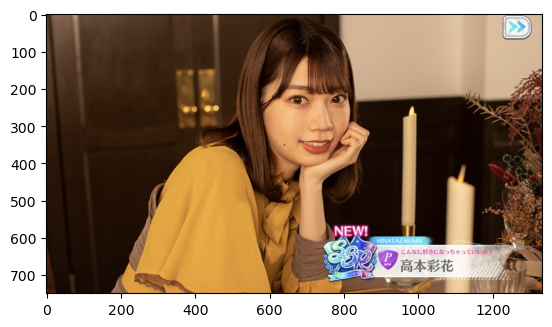

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1334x750 at 0x7FF5A4F887C0>


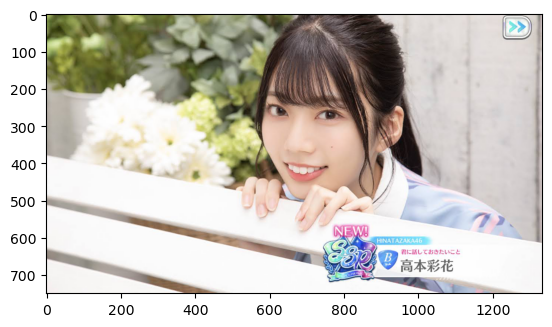

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x988 at 0x7FF5A4B15B50>


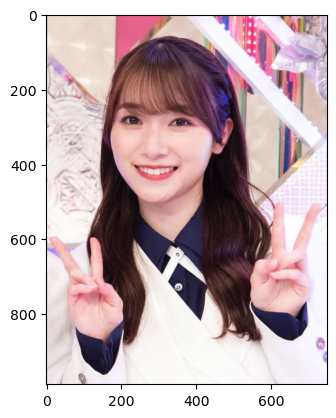

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x1334 at 0x7FF5A7527EB0>


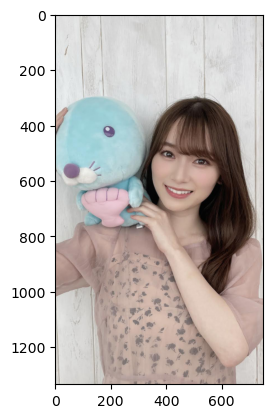

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x553 at 0x7FF5A6EF4400>


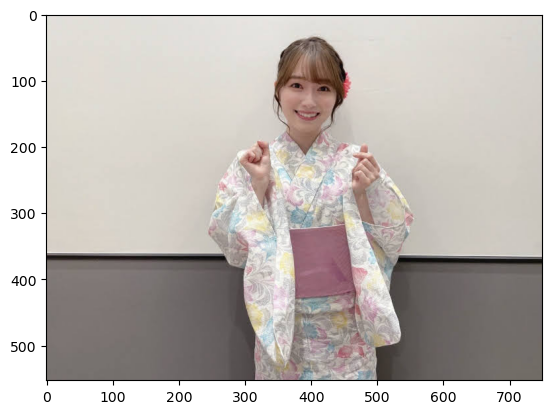

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x1334 at 0x7FF5A6EEE970>


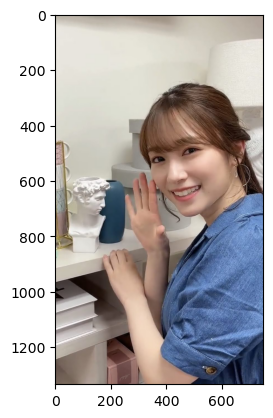

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x853 at 0x7FF5A6EE9EB0>


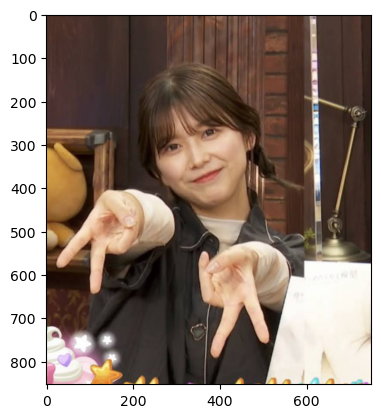

In [12]:
"""
./images/verify_imgから顔抽出してフォルダface_cripに保存
"""
import dlib
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image

file_path="./images/verify_img/*.png"
images=sorted(glob.glob(file_path))
n_img=16

plt.figure(figsize=(6,6))

for img in images:
    img=Image.open(img)
    print(img)
    plt.imshow(img)
    plt.show()

In [32]:
# 顔抽出
detector=dlib.get_frontal_face_detector()
red=(255,0,0)

for i,img in enumerate(images):
    img=cv2.imread(img)
#     img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dets=detector(img)
    
    for d in dets:
        x1=d.left()
        y1=d.top()
        x2=d.right()
        y2=d.bottom()
        face=img[y1:y2, x1:x2]
        face=cv2.resize(face, (50,50))
#         rec=cv2.rectangle(img, (x1,y1), (x2,y2), color=red, lineType=cv2.LINE_AA, thickness=2)
#         plt.imshow(rec)
#         plt.imshow(face)
#         plt.show()

    out="./images/face_crip/"+str(i)+".png"
    cv2.imwrite(out, face)


In [45]:
# PCA
import numpy as np
import matplotlib.pyplot as plt
import glob 
from PIL import Image
from sklearn.decomposition import PCA

input_file="./images/face_crip/*.png"
images=sorted(glob.glob(input_file))

data=[]
for img in images:
    img=Image.open(img)
    img=np.array(img)
    img=img.flatten()/255.0
    data.append(img)


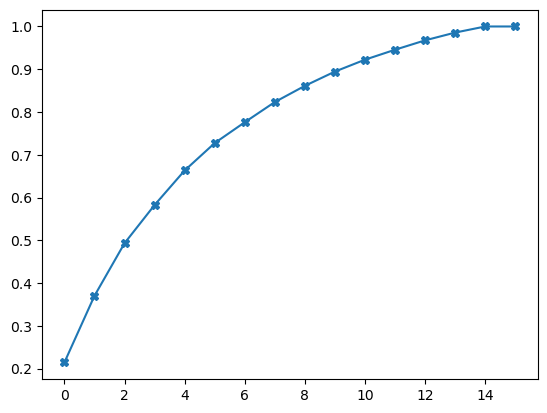

In [61]:
pca = PCA(n_components=16)
pca.fit(data)
accumulated_variance_ratio = np.add.accumulate(pca.explained_variance_ratio_)
plt.plot(accumulated_variance_ratio, marker = "X")
plt.show()

In [62]:
pca = PCA(n_components=16)
pca.fit(data)
data_2d=pca.transform(data)

In [63]:
data_2d

array([[-6.19906125e-01, -3.28912732e+00,  1.24199233e+01,
        -2.35592716e-01,  5.56829821e+00,  4.39962317e+00,
         1.57859458e+00, -6.32291723e+00, -3.20060081e+00,
        -4.12375643e+00,  2.32690870e+00, -1.95977572e+00,
        -1.05864635e+00, -7.83026581e-01,  6.97797860e-01,
        -1.86591194e-15],
       [ 1.08215760e-01,  7.94346922e+00,  4.37805371e+00,
        -2.94853318e+00, -1.03626688e+00, -3.01903091e+00,
        -5.25750054e+00,  1.79239763e+00, -3.37536745e+00,
        -1.53496662e+00, -1.15344260e+00,  2.42979183e-01,
        -2.77855728e+00,  3.83689760e+00, -4.01959679e+00,
         6.67434857e-15],
       [-7.46423717e+00, -9.95407248e+00,  2.00804193e+00,
         5.51781055e+00,  2.37488912e+00,  4.63413368e+00,
        -5.97162543e+00, -1.51973538e+00,  8.88110619e-01,
         4.91856071e+00, -1.13977034e+00,  3.65517392e+00,
         6.92902116e-01,  2.31614561e+00,  6.22785113e-01,
         3.87623961e-15],
       [-1.15265255e+01, -3.19902669e

In [58]:
pca = PCA(n_components=5)
pca.fit(data)
data_latent = pca.transform(data)

# 1 : 回転式メーター
# 2 ：アナログパネルメーター
y_list = np.array([1,2,3,4,5,6,7])

for j in range(0, len(y_list)):
        condition = np.where(Y_label == y_list[j])
        plt.scatter( data_latent[condition][:,0], data_latent[condition][:,1], s=10, label = y_list[j])

plt.show()

NameError: name 'Y_label' is not defined